In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
 keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
 train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
def model_fn(a_layer=None):
 model = keras.Sequential()
 model.add(keras.layers.Flatten(input_shape=(28, 28)))
 model.add(keras.layers.Dense(100, activation='relu'))
 if a_layer:
  model.add(a_layer)
 model.add(keras.layers.Dense(10, activation='softmax'))
 return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [10]:
print(history.history.keys())
print(history.history['loss'])

dict_keys(['loss', 'accuracy'])
[0.5320355296134949, 0.3917659819126129, 0.3534281849861145, 0.3304900527000427, 0.3173384666442871]


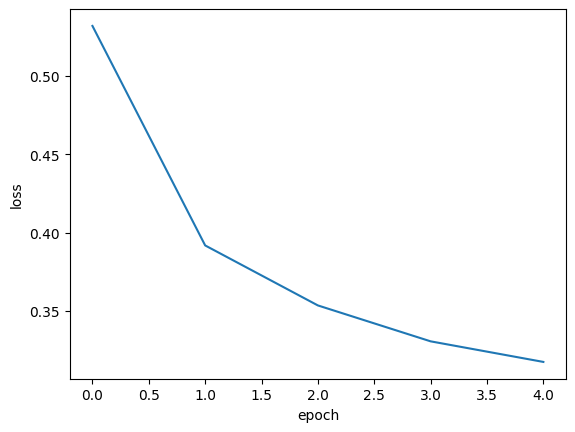

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

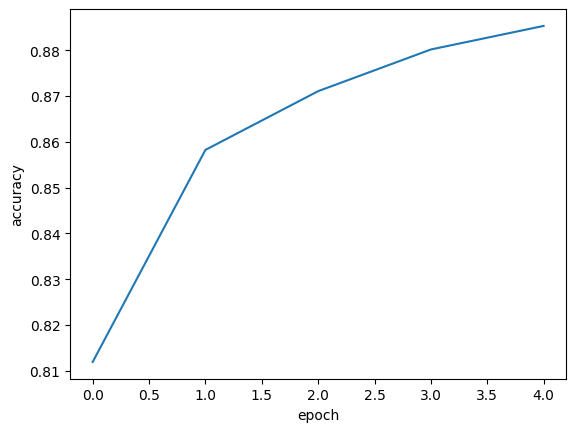

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
 validation_data=(val_scaled, val_target))

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


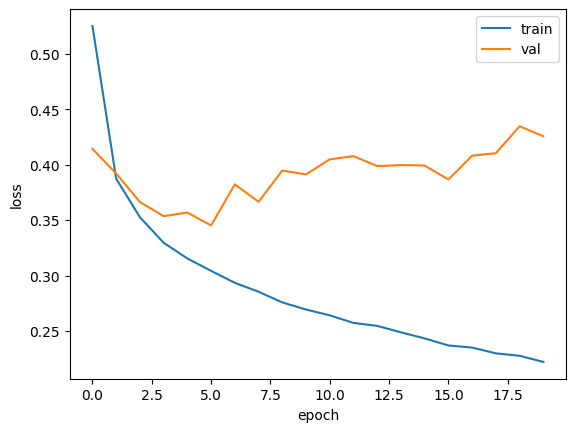

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

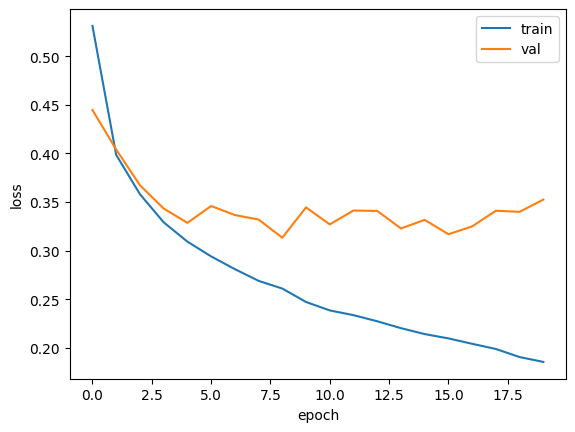

In [18]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
 metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
 validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
# dropout

# 30% dropout
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


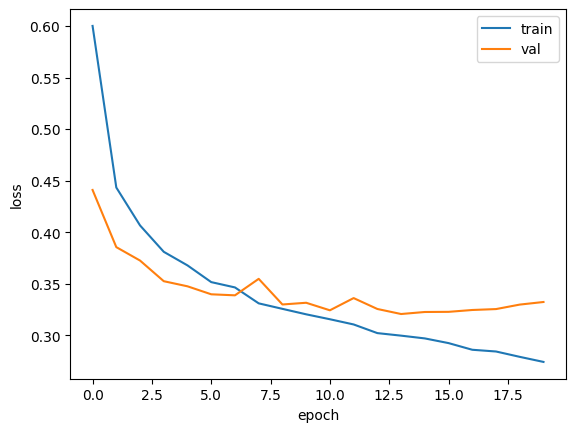

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
 metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
 validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
 metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
 validation_data=(val_scaled, val_target))

In [22]:
model.save_weights('model-weights.h5')

In [24]:
model.save('model-whole.h5')

In [25]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Aug 12 09:22 model-weights.h5
-rw-r--r-- 1 root root 981176 Aug 12 09:22 model-whole.h5


In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [27]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 3ms/step
0.8821666666666667


In [28]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3285 - accuracy: 0.8822


[0.3284913897514343, 0.8821666836738586]

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
 metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
 save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
 validation_data=(val_scaled, val_target),
 callbacks=[checkpoint_cb])

In [30]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3163 - accuracy: 0.8861


[0.3163483440876007, 0.8860833048820496]

In [31]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
 metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
 save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
 restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
 validation_data=(val_scaled, val_target),
 callbacks=[checkpoint_cb, early_stopping_cb])

In [32]:
print(early_stopping_cb.stopped_epoch)

9


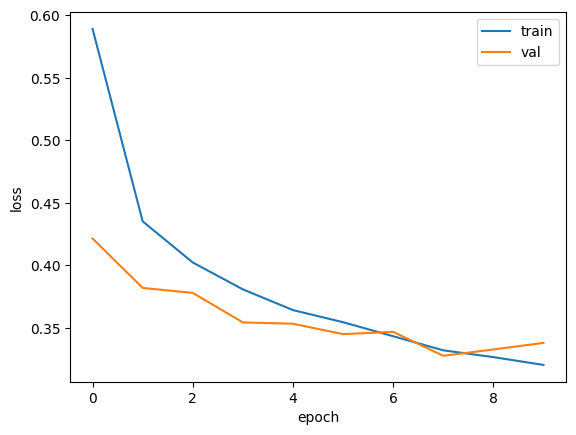

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [34]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3277 - accuracy: 0.8818


[0.32765164971351624, 0.8818333148956299]